In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_name = "CostManagement_marsaazplan_atria_2023-04-14-1301.xlsx"
data_df = pd.read_excel(file_name, sheet_name="Data")
data_df = data_df[['UsageDate', "ServiceName", "CostUSD"]]

In [3]:
data_df.head(25)

,UsageDate,ServiceName,CostUSD
0,2022-10-01,App Configuration,37.200000
1,2022-10-01,Azure Database for PostgreSQL,161.894600
2,2022-10-01,Bandwidth,1.569307
3,2022-10-01,Container Registry,51.665013
4,2022-10-01,Key Vault,0.000978
5,2022-10-01,Load Balancer,45.822479
6,2022-10-01,Log Analytics,109.533551
7,2022-10-01,Storage,185.455020
8,2022-10-01,Virtual Machines,48.000000
9,2022-10-01,Virtual Network,11.160000


In [4]:
date_list_to_remove = ['2022-10-01', '2022-11-01']
#date_list_to_remove = ['2022-10-01']
for date in date_list_to_remove:
    data_df = data_df[data_df.UsageDate != date]

In [5]:
data_df.reset_index()

,index,UsageDate,ServiceName,CostUSD
0,20,2022-12-01,App Configuration,75.600000
1,21,2022-12-01,Azure Database for PostgreSQL,226.749637
2,22,2022-12-01,Azure DNS,0.618686
3,23,2022-12-01,Bandwidth,0.424482
4,24,2022-12-01,Container Registry,21.471366
5,25,2022-12-01,Key Vault,0.003282
6,26,2022-12-01,Load Balancer,88.944535
7,27,2022-12-01,Log Analytics,108.095370
8,28,2022-12-01,Storage,430.785977
9,29,2022-12-01,Virtual Machines,586.396631


In [6]:
data_df['ServiceName'] = data_df['ServiceName'].str.replace('Azure Database for PostgreSQL','PostgreSQL')

In [7]:
data_df["ServiceName"].head(len(data_df["ServiceName"].unique()))

20     App Configuration
21            PostgreSQL
22             Azure DNS
23             Bandwidth
24    Container Registry
25             Key Vault
26         Load Balancer
27         Log Analytics
28               Storage
29      Virtual Machines
30       Virtual Network
Name: ServiceName, dtype: object

In [8]:
average_costs = data_df.groupby(['ServiceName'], as_index=False).mean()
average_costs

,ServiceName,CostUSD
0,App Configuration,72.900000
1,Azure DNS,0.700113
2,Bandwidth,0.449979
3,Container Registry,20.366462
4,Key Vault,0.751395
5,Load Balancer,87.938896
6,Log Analytics,106.525412
7,PostgreSQL,222.039723
8,Storage,484.714281
9,Virtual Machines,576.332204


In [9]:
average_costs.columns

Index(['ServiceName', 'CostUSD'], dtype='object')

In [10]:
average_costs["Cost_by_percentage"] = average_costs["CostUSD"]/average_costs["CostUSD"].sum()*100
average_costs = average_costs.sort_values(by=['Cost_by_percentage'], ascending=False)
average_costs

,ServiceName,CostUSD,Cost_by_percentage
9,Virtual Machines,576.332204,36.147794
8,Storage,484.714281,30.401480
7,PostgreSQL,222.039723,13.926423
6,Log Analytics,106.525412,6.681318
5,Load Balancer,87.938896,5.515564
0,App Configuration,72.900000,4.572318
10,Virtual Network,21.658775,1.358447
3,Container Registry,20.366462,1.277393
4,Key Vault,0.751395,0.047128
1,Azure DNS,0.700113,0.043911


In [11]:
important_columns = average_costs[average_costs["Cost_by_percentage"] >2]
important_columns

,ServiceName,CostUSD,Cost_by_percentage
9,Virtual Machines,576.332204,36.147794
8,Storage,484.714281,30.401480
7,PostgreSQL,222.039723,13.926423
6,Log Analytics,106.525412,6.681318
5,Load Balancer,87.938896,5.515564
0,App Configuration,72.900000,4.572318


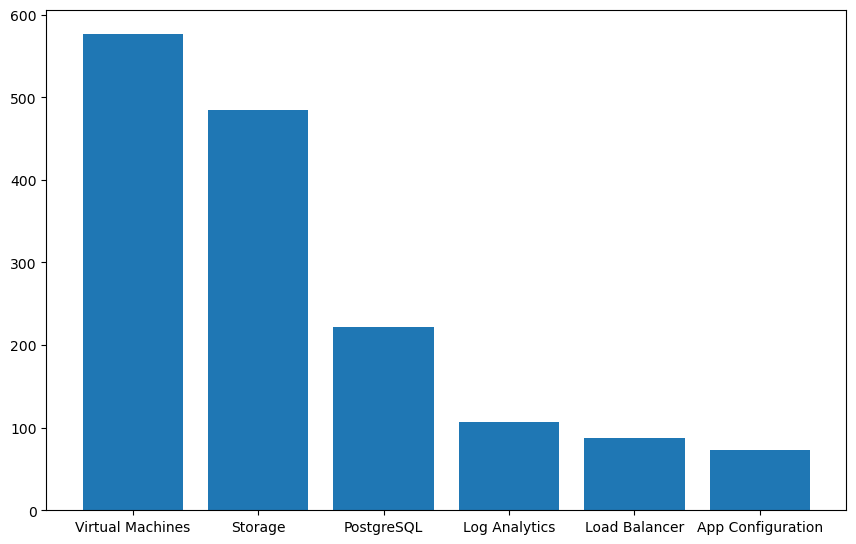

In [12]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(important_columns["ServiceName"], important_columns["CostUSD"])
plt.show()

In [13]:
list_of_services = list(average_costs["ServiceName"].unique())
list_of_services

['Virtual Machines',
 'Storage',
 'PostgreSQL',
 'Log Analytics',
 'Load Balancer',
 'App Configuration',
 'Virtual Network',
 'Container Registry',
 'Key Vault',
 'Azure DNS',
 'Bandwidth']

In [14]:
total_id_list = []
total_value_list = []

for service in list_of_services:
    test = data_df.loc[data_df['ServiceName'] == service]["CostUSD"]/int(average_costs.loc[average_costs['ServiceName'] == service]["CostUSD"])*100
    for index in test.index:
        total_id_list.append(index)
    for value in test:
        total_value_list.append(value)


index_value_dict = dict(zip(total_id_list, total_value_list))
keys_list = list(index_value_dict.keys())
keys_list.sort()
sorted_index_value_dict = {key: index_value_dict[key] for key in keys_list}
sorted_index_value_dict


{20: 105.0,
 21: 102.13947592754045,
 22: inf,
 23: inf,
 24: 107.356831584,
 25: inf,
 26: 102.23509722725113,
 27: 101.97676370949628,
 28: 89.00536715265083,
 29: 101.80497073940973,
 30: 103.97666005291003,
 31: 103.33333333333331,
 32: 101.5755855855856,
 33: inf,
 34: inf,
 35: 103.32382658399999,
 36: inf,
 37: 104.45271694607732,
 38: 105.18121296883723,
 39: 106.36430515288843,
 40: 102.77924240190974,
 41: 106.28571428571429,
 42: 93.33333333333333,
 43: 91.66867383512547,
 44: inf,
 45: inf,
 46: 93.32474659199997,
 47: inf,
 48: 93.85460440887826,
 49: 93.4557099969186,
 50: 102.68060785653721,
 51: 92.86666666666663,
 52: 96.00000000000003,
 53: 103.33333333333334,
 54: 104.68783783783789,
 55: inf,
 56: inf,
 57: 103.32382658399996,
 58: inf,
 59: 103.77434608307081,
 60: 101.36900182822788,
 61: 102.5400343917934,
 62: 102.77981753263887,
 63: 106.28571428571432}

In [15]:
data_df['index_column'] = data_df.index

In [16]:
data_df['Percentage from the Average Cost'] = data_df['index_column'].map(sorted_index_value_dict)
data_df

,UsageDate,ServiceName,CostUSD,index_column,Percentage from the Average Cost
20,2022-12-01,App Configuration,75.600000,20,105.000000
21,2022-12-01,PostgreSQL,226.749637,21,102.139476
22,2022-12-01,Azure DNS,0.618686,22,inf
23,2022-12-01,Bandwidth,0.424482,23,inf
24,2022-12-01,Container Registry,21.471366,24,107.356832
25,2022-12-01,Key Vault,0.003282,25,inf
26,2022-12-01,Load Balancer,88.944535,26,102.235097
27,2022-12-01,Log Analytics,108.095370,27,101.976764
28,2022-12-01,Storage,430.785977,28,89.005367
29,2022-12-01,Virtual Machines,586.396631,29,101.804971


In [17]:
data_df.drop(['index_column'], axis=1, inplace=True)
data_df

,UsageDate,ServiceName,CostUSD,Percentage from the Average Cost
20,2022-12-01,App Configuration,75.600000,105.000000
21,2022-12-01,PostgreSQL,226.749637,102.139476
22,2022-12-01,Azure DNS,0.618686,inf
23,2022-12-01,Bandwidth,0.424482,inf
24,2022-12-01,Container Registry,21.471366,107.356832
25,2022-12-01,Key Vault,0.003282,inf
26,2022-12-01,Load Balancer,88.944535,102.235097
27,2022-12-01,Log Analytics,108.095370,101.976764
28,2022-12-01,Storage,430.785977,89.005367
29,2022-12-01,Virtual Machines,586.396631,101.804971


In [18]:
monthly_prices_df = data_df.groupby(['UsageDate'], as_index=False)['CostUSD'].sum()
data_df = data_df[data_df.UsageDate != date]
monthly_prices_df = monthly_prices_df.replace('2022-11-01','November')
monthly_prices_df = monthly_prices_df.replace('2022-12-01','December')
monthly_prices_df = monthly_prices_df.replace('2023-01-01','January')
monthly_prices_df = monthly_prices_df.replace('2023-02-01','February')
monthly_prices_df = monthly_prices_df.replace('2023-03-01','March')
print(monthly_prices_df)

  UsageDate      CostUSD
0  December  1560.925064
1   January  1653.212208
2  February  1523.435270
3     March  1639.936417


In [19]:
average_monthly_price = monthly_prices_df['CostUSD'].mean()
average_monthly_price

1594.3772396646875

In [20]:
monthly_prices_df['CostUSD'].sum()

6377.50895865875

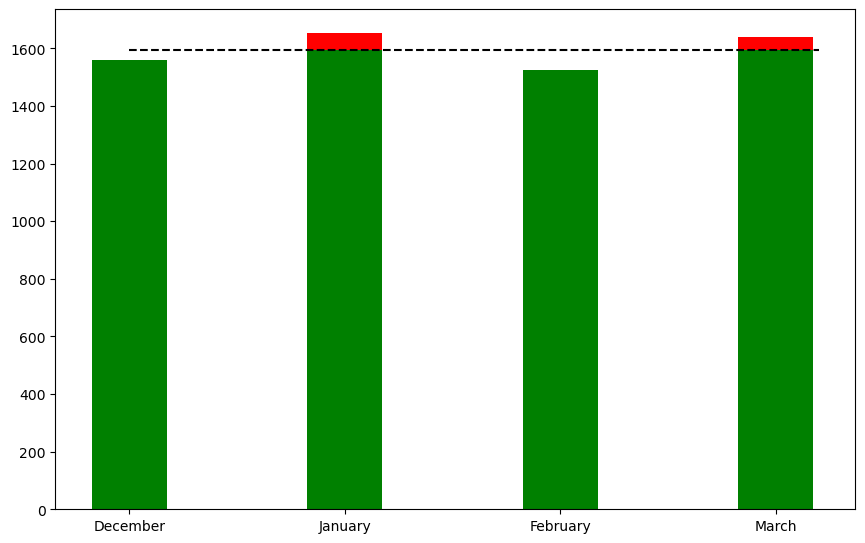

In [26]:
fig = plt.figure(figsize=(8,5))
threshold = average_monthly_price
above_threshold = np.maximum(monthly_prices_df["CostUSD"].values - threshold, 0)
below_threshold = np.minimum(monthly_prices_df["CostUSD"].values, threshold)
ax = fig.add_axes([0,0,1,1])
ax.bar(monthly_prices_df["UsageDate"], below_threshold, 0.35, color="g")
ax.bar(monthly_prices_df["UsageDate"], above_threshold, 0.35, color="r", bottom=below_threshold)
#ax.plot([0., 4.5], [threshold, threshold], "k--")
ax.plot([0., 3.2], [threshold, threshold], "k--")
#ax.bar(monthly_prices_df["UsageDate"], monthly_prices_df["CostUSD"])
plt.show()

In [22]:
data_df = data_df[data_df["CostUSD"] >60]

In [23]:
data_df

,UsageDate,ServiceName,CostUSD,Percentage from the Average Cost
20,2022-12-01,App Configuration,75.600000,105.000000
21,2022-12-01,PostgreSQL,226.749637,102.139476
26,2022-12-01,Load Balancer,88.944535,102.235097
27,2022-12-01,Log Analytics,108.095370,101.976764
28,2022-12-01,Storage,430.785977,89.005367
29,2022-12-01,Virtual Machines,586.396631,101.804971
31,2023-01-01,App Configuration,74.400000,103.333333
32,2023-01-01,PostgreSQL,225.497800,101.575586
37,2023-01-01,Load Balancer,90.873864,104.452717
38,2023-01-01,Log Analytics,111.492086,105.181213
